In [1]:
import tslearn as ts

c:\Users\efons\anaconda3\envs\test\Lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


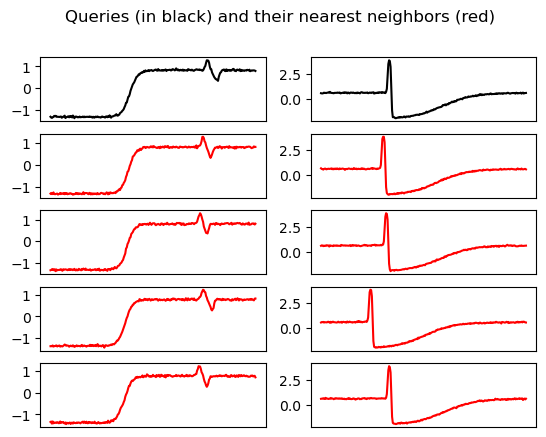

In [2]:
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt

from tslearn.neighbors import KNeighborsTimeSeries
from tslearn.datasets import CachedDatasets

seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")

n_queries = 2
n_neighbors = 4

knn = KNeighborsTimeSeries(n_neighbors=n_neighbors)
knn.fit(X_train)
ind = knn.kneighbors(X_test[:n_queries], return_distance=False)

plt.figure()
for idx_ts in range(n_queries):
    plt.subplot(n_neighbors + 1, n_queries, idx_ts + 1)
    plt.plot(X_test[idx_ts].ravel(), "k-")
    plt.xticks([])
    for rank_nn in range(n_neighbors):
        plt.subplot(n_neighbors + 1, n_queries,
                    idx_ts + (n_queries * (rank_nn + 1)) + 1)
        plt.plot(X_train[ind[idx_ts, rank_nn]].ravel(), "r-")
        plt.xticks([])


plt.suptitle("Queries (in black) and their nearest neighbors (red)")
plt.show()

In [3]:
import pandas as pd
pd.__version__

'2.0.2'